In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('OnlineNewsPopularity.csv')
data.head(2)

,url,Date,ID,Age of Poast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,2013/01/07,amaM1,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,0,1,0,0,0,0,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.0,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.013699,0.769231,0.230769,0.092562,0.378636,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,2013/01/07,ap M2,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,0,0,1,0,0,0,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.015686,0.733333,0.266667,0.148948,0.286915,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


In [4]:
data.shape

(39644, 63)

In [5]:
# creating a grading criteria for the shares
share_data = data[' shares']
data[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [6]:
39644-39336 

308

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 63 columns):
url                               39644 non-null object
Date                              39644 non-null object
ID                                39644 non-null object
Age of Poast                      39644 non-null int64
 n_tokens_title                   39644 non-null int64
 n_tokens_content                 39644 non-null int64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null int64
 num_self_hrefs                   39644 non-null int64
 num_imgs                         39644 non-null int64
 num_videos                       39644 non-null int64
 average_token_length             39644 non-null float64
 data_channel_is_lifestyle        39644 non-null int64
 data_channel_is_entertainment    39644 non-null int64


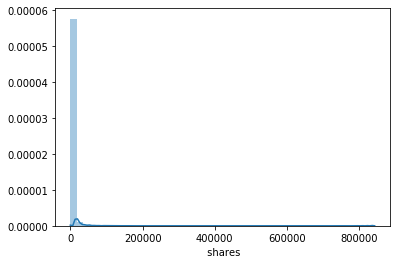

In [8]:
sns.distplot(data[' shares'])

In [9]:
data['Popularity']=pd.qcut(data[' shares'],2,labels=['Unpopular','Popular'])

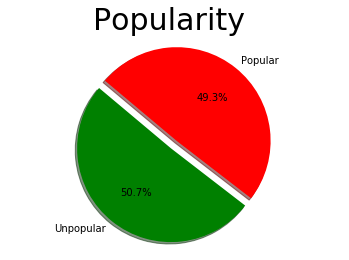

In [10]:
labels =["Unpopular","Popular"]
sizes = data['Popularity'].value_counts(sort = True)
colors = ["g","r"]
explode = (0.1,0)  
 

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.figtext(.5,.9,'Popularity',fontsize=30,ha='center')
plt.show()

In [11]:
data['Popularity'].value_counts()

Unpopular    20082
Popular      19562
Name: Popularity, dtype: int64

In [12]:
data.groupby('Popularity')[' shares'].min()

Popularity
Unpopular       1
Popular      1500
Name:  shares, dtype: int64

In [13]:
data.groupby('Popularity')[' shares'].max()

Popularity
Unpopular      1400
Popular      843300
Name:  shares, dtype: int64

In [14]:
data.head()

,url,Date,ID,Age of Poast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,2013/01/07,amaM1,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,0,1,0,0,0,0,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.013699,0.769231,0.230769,0.092562,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,Unpopular
1,http://mashable.com/2013/01/07/ap-samsung-spon...,2013/01/07,ap M2,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,0,0,1,0,0,0,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.015686,0.733333,0.266667,0.148948,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,Unpopular
2,http://mashable.com/2013/01/07/apple-40-billio...,2013/01/07,appM3,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,0,0,1,0,0,0,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.056872,0.009479,0.857143,0.142857,0.323333,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,Popular
3,http://mashable.com/2013/01/07/astronaut-notre...,2013/01/07,astM4,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,0,1,0,0,0,0,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.041431,0.020716,0.666667,0.333333,0.100705,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,Unpopular
4,http://mashable.com/2013/01/07/att-u-verse-apps/,2013/01/07,attM5,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,0,0,0,0,1,0,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.074627,0.012127,0.860215,0.139785,0.281003,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,Unpopular


In [15]:
data['is_weekday'] = (data[' weekday_is_monday'] +  data[' weekday_is_tuesday'] + data[' weekday_is_wednesday'] + 
                   data[' weekday_is_thursday'] + data[' weekday_is_friday'])

In [16]:
df_1 = data[[' data_channel_is_lifestyle', ' data_channel_is_entertainment',' data_channel_is_bus',
             ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world']]

In [17]:
data['data_channel_type']=df_1.idxmax(axis=1)

In [18]:
df_2 = data[[' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday']]

In [19]:
data['Days'] = df_2.idxmax(axis=1)

In [20]:
#  #drop the old data
# #data.drop(labels=[' data_channel_is_lifestyle',' data_channel_is_entertainment' ,' data_channel_is_bus',
#                        ' data_channel_is_socmed' ,' data_channel_is_tech',' data_channel_is_world', 
#                  ' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday', 
#                      ' weekday_is_thursday', ' weekday_is_friday',' weekday_is_saturday' ,' weekday_is_sunday'], axis = 1, inplace=True)
# print(data.shape)
# data.head(n=10)

In [21]:
def outliers_indices(feature):
    mid = data[feature].mean()
    sigma = data[feature].std()
    return data[(data[feature] < mid - 3*sigma) | (data[feature] > mid + 3*sigma)].index

In [22]:
wrong_share = outliers_indices(' shares')
#wrong_vid = outliers_indices(' num_videos')
#wrong_img = outliers_indices(' num_imgs')
#wrong_content = outliers_indices(' n_tokens_content')
#wrong_title = outliers_indices(' n_tokens_title')
#wrong_num_hrefs = outliers_indices(' num_hrefs')
#wrong_num_self = outliers_indices(' num_self_hrefs')
out = set(wrong_share) 
#| set(wrong_vid) | set(wrong_img) | set(wrong_content) | set(wrong_title) | set(wrong_num_hrefs) | set(wrong_num_self)

data.drop(out, inplace=True)

In [23]:
data.shape

(39336, 67)

In [24]:
data['Popularity'].value_counts()

Unpopular    20082
Popular      19254
Name: Popularity, dtype: int64

In [25]:
data.groupby('Popularity')[' shares'].min()

Popularity
Unpopular       1
Popular      1500
Name:  shares, dtype: int64

In [26]:
data.groupby('Popularity')[' shares'].max()

Popularity
Unpopular     1400
Popular      38200
Name:  shares, dtype: int64

In [27]:
data.to_csv('NEWS.csv')

In [28]:
cols = [' shares', ' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', ' num_keywords']
data[cols].corr(method='spearman')

,shares,n_tokens_title,n_tokens_content,num_hrefs,num_imgs,num_videos,num_keywords
shares,1.000000,-0.043454,0.012833,0.089272,0.083109,0.043043,0.070703
n_tokens_title,-0.043454,1.000000,0.010915,-0.059972,-0.011724,0.114566,-0.011172
n_tokens_content,0.012833,0.010915,1.000000,0.505920,0.392411,-0.036112,0.079728
num_hrefs,0.089272,-0.059972,0.505920,1.000000,0.347533,-0.031800,0.174981
num_imgs,0.083109,-0.011724,0.392411,0.347533,1.000000,-0.167147,0.084878
num_videos,0.043043,0.114566,-0.036112,-0.031800,-0.167147,1.000000,0.017941
num_keywords,0.070703,-0.011172,0.079728,0.174981,0.084878,0.017941,1.000000


In [29]:
columns = [' shares',' kw_max_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_min_avg', ' kw_max_avg',
           ' kw_avg_avg']
data[columns].corr(method='spearman')

,shares,kw_max_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_min_avg,kw_max_avg,kw_avg_avg
shares,1.000000,0.091949,0.091949,0.095158,0.057391,-0.033832,0.102872,0.216523,0.249981
kw_max_min,0.091949,1.000000,1.000000,0.806790,-0.167055,-0.089454,-0.045961,0.236683,0.123515
kw_max_min,0.091949,1.000000,1.000000,0.806790,-0.167055,-0.089454,-0.045961,0.236683,0.123515
kw_avg_min,0.095158,0.806790,0.806790,1.000000,-0.214611,-0.469532,-0.109329,0.089459,-0.022245
kw_min_max,0.057391,-0.167055,-0.167055,-0.214611,1.000000,0.157907,0.961256,0.127940,0.496535
kw_max_max,-0.033832,-0.089454,-0.089454,-0.469532,0.157907,1.000000,0.141171,0.200329,0.223211
kw_min_avg,0.102872,-0.045961,-0.045961,-0.109329,0.961256,0.141171,1.000000,0.186012,0.554398
kw_max_avg,0.216523,0.236683,0.236683,0.089459,0.127940,0.200329,0.186012,1.000000,0.805826
kw_avg_avg,0.249981,0.123515,0.123515,-0.022245,0.496535,0.223211,0.554398,0.805826,1.000000


In [30]:
data['Popularity'].replace({'Unpopular':0,'Popular':1},inplace=True)

In [31]:
data.head()

,url,Date,ID,Age of Poast,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,global_sentiment_polarity,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,Popularity,is_weekday,data_channel_type,Days
0,http://mashable.com/2013/01/07/amazon-instant-...,2013/01/07,amaM1,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,0,1,0,0,0,0,5,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.045662,0.013699,0.769231,0.230769,0.092562,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0,1,data_channel_is_entertainment,weekday_is_monday
1,http://mashable.com/2013/01/07/ap-samsung-spon...,2013/01/07,ap M2,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,0,0,1,0,0,0,4,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.043137,0.015686,0.733333,0.266667,0.148948,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0,1,data_channel_is_bus,weekday_is_monday
2,http://mashable.com/2013/01/07/apple-40-billio...,2013/01/07,appM3,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,0,0,1,0,0,0,6,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.056872,0.009479,0.857143,0.142857,0.323333,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,1,data_channel_is_bus,weekday_is_monday
3,http://mashable.com/2013/01/07/astronaut-notre...,2013/01/07,astM4,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,0,1,0,0,0,0,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.041431,0.020716,0.666667,0.333333,0.100705,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0,1,data_channel_is_entertainment,weekday_is_monday
4,http://mashable.com/2013/01/07/att-u-verse-apps/,2013/01/07,attM5,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,0,0,0,0,1,0,7,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.074627,0.012127,0.860215,0.139785,0.281003,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0,1,data_channel_is_tech,weekday_is_monday


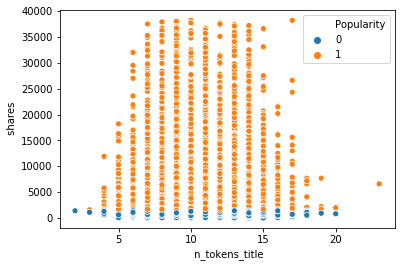

In [32]:
sns.scatterplot(x=data[' n_tokens_title'],y=data[' shares'],hue=data['Popularity'])

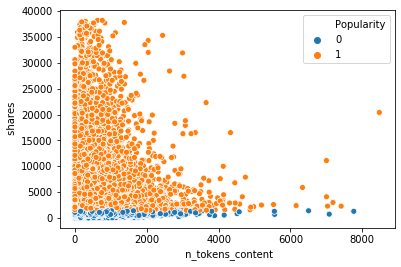

In [33]:
sns.scatterplot(x=data[' n_tokens_content'],y=data[' shares'],hue=data['Popularity'])

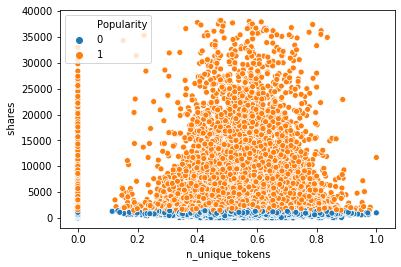

In [34]:
sns.scatterplot(x=data[' n_unique_tokens'][data[' n_unique_tokens']<100],y=data[' shares'],hue=data['Popularity'])

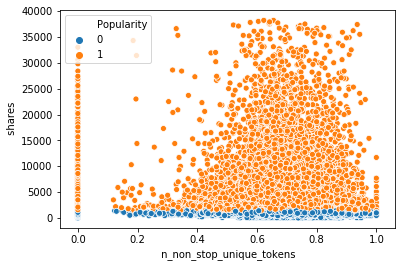

In [35]:
sns.scatterplot(x=data[' n_non_stop_unique_tokens'][data[' n_non_stop_unique_tokens']<100],y=data[' shares'],hue=data['Popularity'])

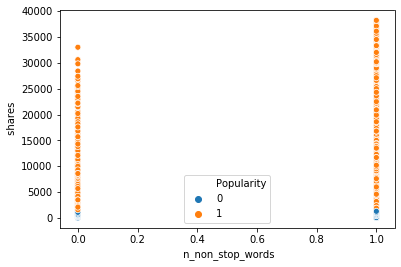

In [36]:
sns.scatterplot(x=data[' n_non_stop_words'][data[' n_non_stop_words']<1],y=data[' shares'],hue=data['Popularity'])

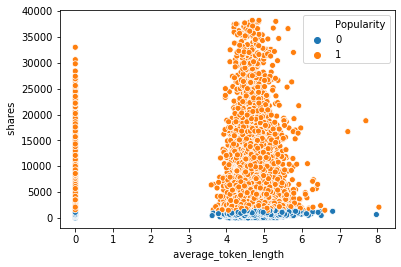

In [37]:
sns.scatterplot(x=data[' average_token_length'],y=data[' shares'],hue=data['Popularity'])

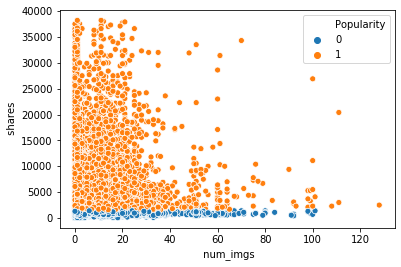

In [38]:
sns.scatterplot(x=data[' num_imgs'],y=data[' shares'],hue=data['Popularity'])

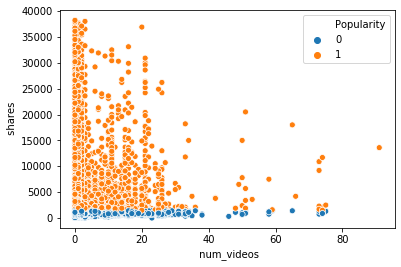

In [39]:
sns.scatterplot(x=data[' num_videos'],y=data[' shares'],hue=data['Popularity'])

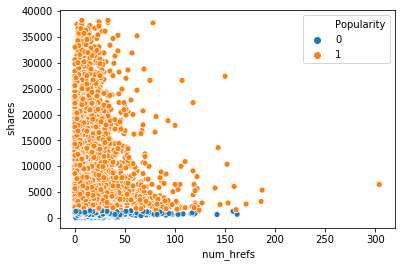

In [40]:
sns.scatterplot(x=data[' num_hrefs'],y=data[' shares'],hue=data['Popularity'])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39336 entries, 0 to 39643
Data columns (total 67 columns):
url                               39336 non-null object
Date                              39336 non-null object
ID                                39336 non-null object
Age of Poast                      39336 non-null int64
 n_tokens_title                   39336 non-null int64
 n_tokens_content                 39336 non-null int64
 n_unique_tokens                  39336 non-null float64
 n_non_stop_words                 39336 non-null float64
 n_non_stop_unique_tokens         39336 non-null float64
 num_hrefs                        39336 non-null int64
 num_self_hrefs                   39336 non-null int64
 num_imgs                         39336 non-null int64
 num_videos                       39336 non-null int64
 average_token_length             39336 non-null float64
 data_channel_is_lifestyle        39336 non-null int64
 data_channel_is_entertainment    39336 non-null int64


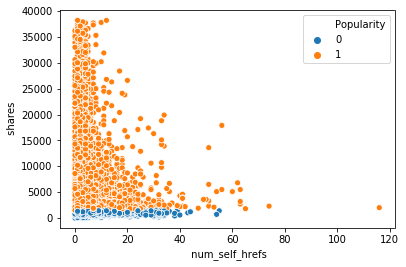

In [42]:
sns.scatterplot(x=data[' num_self_hrefs'],y=data[' shares'],hue=data['Popularity'])

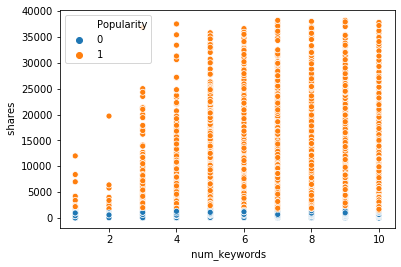

In [43]:
sns.scatterplot(x=data[' num_keywords'],y=data[' shares'],hue=data['Popularity'])

In [44]:
data.columns

Index(['url', 'Date', 'ID', 'Age of Poast', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity

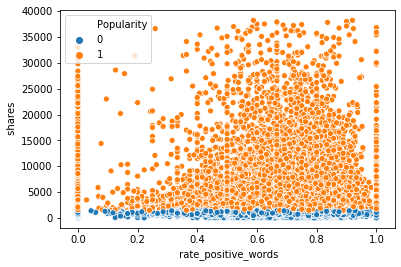

In [45]:
sns.scatterplot(x=data[' rate_positive_words'],y=data[' shares'],hue=data['Popularity'])

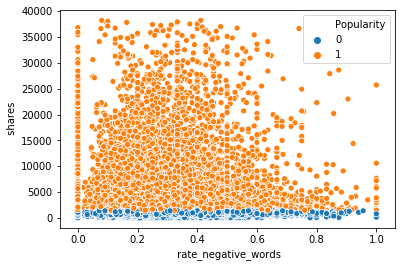

In [46]:
sns.scatterplot(x=data[' rate_negative_words'],y=data[' shares'],hue=data['Popularity'])

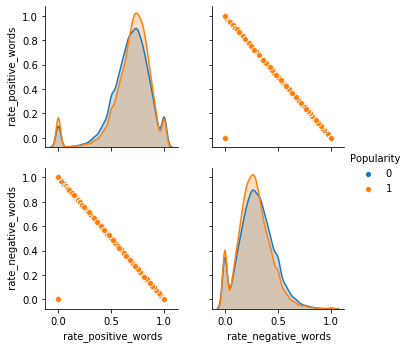

In [47]:
a=data[[' rate_positive_words', ' rate_negative_words']]
sns.pairplot(data,vars=a,hue='Popularity',diag_kind='kde')

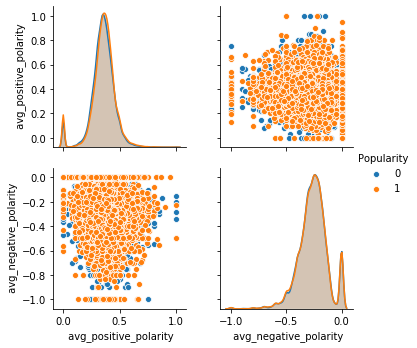

In [48]:
b=data[[' avg_positive_polarity',' avg_negative_polarity']]
sns.pairplot(data,vars=b,hue='Popularity',diag_kind='kde')

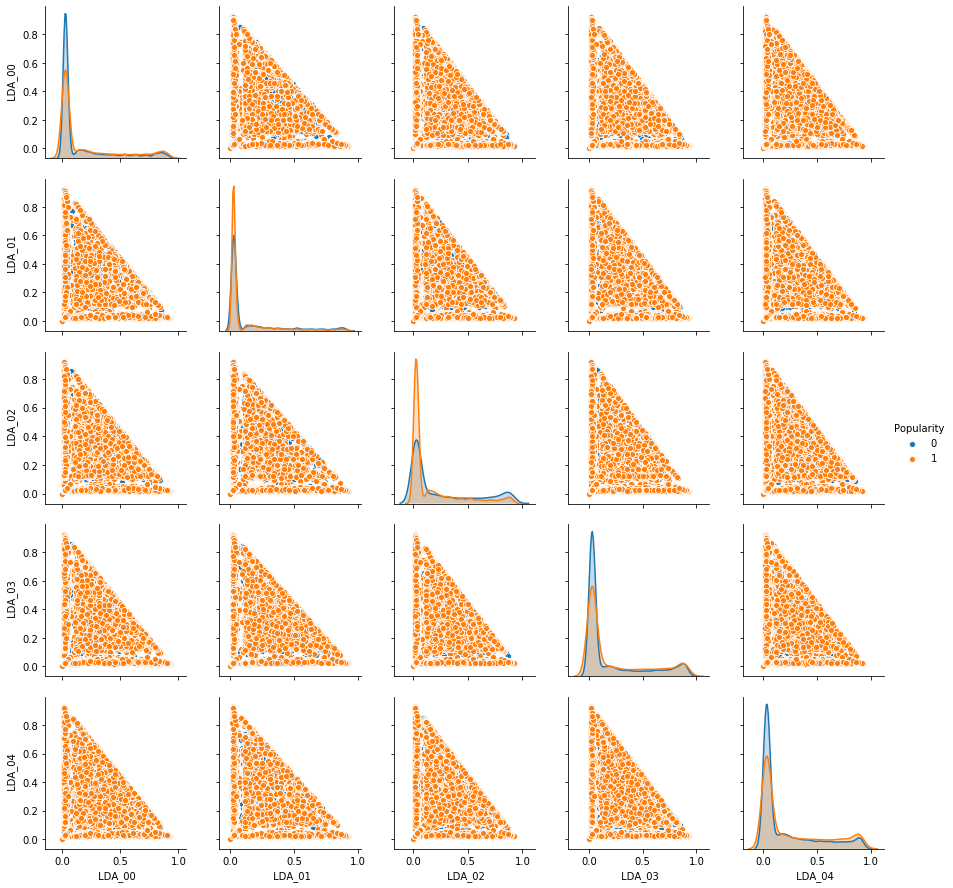

In [49]:
c=data[[' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04']]
sns.pairplot(data,vars=c,hue='Popularity',diag_kind='kde')

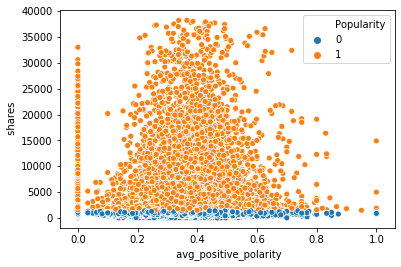

In [50]:
sns.scatterplot(x=data[' avg_positive_polarity'],y=data[' shares'],hue=data['Popularity'])

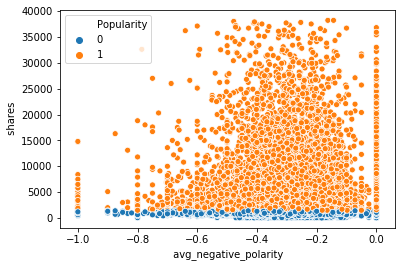

In [51]:
sns.scatterplot(x=data[' avg_negative_polarity'],y=data[' shares'],hue=data['Popularity'])

In [52]:
data.columns

Index(['url', 'Date', 'ID', 'Age of Poast', ' n_tokens_title',
       ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' data_channel_is_lifestyle', ' data_channel_is_entertainment',
       ' data_channel_is_bus', ' data_channel_is_socmed',
       ' data_channel_is_tech', ' data_channel_is_world', ' num_keywords',
       ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max',
       ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity

In [53]:
y=data['Popularity']
x=data[[ ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' num_keywords', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday',
       ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
       ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' global_sentiment_polarity',
       ' avg_positive_polarity', ' min_positive_polarity',
       ' max_positive_polarity', ' avg_negative_polarity',
       ' min_negative_polarity', ' max_negative_polarity',
       ' title_subjectivity', ' title_sentiment_polarity',
       ' abs_title_subjectivity', ' abs_title_sentiment_polarity']]

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
df_scaled = scaler.transform(x)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_scaled,y,test_size=0.3,random_state=0)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
print('R^2= ', metrics.accuracy_score(y_test,y_pred))

R^2=  0.6532497245996102


In [57]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred=DT.predict(x_test)
print('R^2= ', metrics.accuracy_score(y_test,y_pred))

R^2=  0.5746970595712227


In [58]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=10)
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)
print('R^2= ', metrics.accuracy_score(y_test,y_pred))

R^2=  0.6187611219388187


In [59]:
import statsmodels.api as sm
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

[' n_tokens_content', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' average_token_length', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' num_keywords', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_rate_positive_words', ' global_rate_negative_words', ' rate_positive_words', ' min_positive_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity']


In [60]:
from sklearn.feature_selection import RFE
model = LogisticRegression()
rfe = RFE(model, len(cols))
X_rfe = rfe.fit_transform(x,y)  

model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True False  True  True
  True  True  True  True  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True  True  True]
[ 1  4  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2 10  7 17 11 12  5
  6  3  9 13  8  1  1  1  1 14  1  1  1  1  1  1  1  1  1 15  1 16  1  1
  1  1  1  1  1  1  1  1  1  1]


In [ ]:
nof_list=np.arange(1,60)            
high_score=0
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LogisticRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(x.columns)
model = LogisticRegression()
rfe = RFE(model, 60)             
X_rfe = rfe.fit_transform(x,y)  

model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)